# Vi rulla baller ned en rampe - En novelle
Ulrik Garmark Anker, Paul Christian Capellen, Paulius Juzenas, Nils Rogmo, Lorang Strand <br>

## Sammendrag



Sammendraget inneholder en konsis oppsummering av innholdet i oppgaven. Det kan være en god idé å skrive denne delen til slutt, når du har god oversikt over hele teksten. Typisk inneholder sammendraget 4-5 setninger. På disse få setningene skal førsøket introduseres, de eksperimentelle og numeriske metodene nevnes, og resultatene - og deres betydning - skal presenteres. Sentrale tallverdier oppgis med tilhørende usikkerhet.

## Introduksjon
Denne labben har som formål å utforske fundamentale prinsipper innenfor klassisk mekanikk ved å analysere bevegelsen til en kule som beveger seg langs en bane. En ideell modell av systemet blir konstruert ved bruk av newtons andre bevegelseslov og energibevarelse og sammenlignet med en reell gjennomførelses av eksperimentet.

## Teori
Her presenteres relevant teori nødvendig for å lese resten av rapporten. Jupyter notebook støtter LaTeX-kode, så dere kan inkludere fint formaterte ligninger her. For eksempel har vi sett at baneakselerasjonen til ei kompakt kule som ruller på et krumt underlag uten å slure (gli) er gitt ved
$$a = -\frac{5g\sin{\beta}}{7},\label{eq1}\tag{1}$$
der $g$ er tyngdens akselerasjon og $\beta$ er banens helningsvinkel. Her forklarer vi alle nye størrelser som blir innført med ord. <br>
For at dette skal ha god flyt, skal ligningene kunne leses som en naturlig del av setningen, slik som ovenfor. 

Teoridelen inneholder ikke referanser til selve forsøket. Den er generell og kan leses isolert fra resten av rapporten.

Her vil det ofte være naturlig å inkludere en eller flere forklarende figurer. Disse skal dere lage selv, for eksempel ved hjelp av [Inkscape](https://inkscape.org/) som er et nokså brukervennlig program for å lage vektorgrafikk. Her er et eksempel på en slik figur:


## Metode
Denne notebooken genererer en berg-og-dal-bane basert på koordinatene til åtte festepunkter med tildels 
tilfeldig valgte høyder. Baneformen $y(x)$ beregnes numerisk med funksjonen __CubicSpline__ fra interpolate-biblioteket i SciPy. En naturlig kubisk spline $S$ består av ulike tredjegradspolynomer på deler av et intervall $[a,b]$, slik at $S$, $S' = dS/dx$ og $S'' = d^2S/dx^2$ er kontinuerlige på hele intervallet, og $S''(a) = S''(b) = 0$.

Fra den numeriske beregningen av $y(x)$ er vi stand til å vise den beregnede den momentane hastigheten, akslereasjon, banens krumning og kinetisk energi. De numeriske beregningene skal sammenlignes med de observerte fra den fysiske modellen av kulebanen.

En modell av berg-og-dal-banen blir fysisk realisert ved å bygge en ramme i aluminiumsprofiler med åtte stolper montert hver 200mm innenfor rammen.
På hver av stolpene er det montert en festeskrue som brukes til å justere inn banen til riktig høyde ut i fra de numeriske beregniningene. 
I forsøket er vi kun interessert i å observere kulens bane som funksjon av relativ endring i høyde. 

For at ballen skal ha ren rullende bevegelse gjennom hele banen er det nødvendig at banen er en glatt funksjon, samt at banens krumning er større enn kulas radius. Dette blir mer diskutert i teori-delen. 
For å ha ren rulling er det også nødvendig at underlaget har optimalt med friskjon slik at kulen hverken slurer eller klistes til underlaget. 
Ved å velge banens underlag til å være laget av en tynn, fleksibel, stripe hardplast slår vi to fluer i en smekk ved å:
- Forsikre kontinuitet i banen.
- Ha lav friksjon.

Kulen realiserer ved å ta i bruk en ball fra en datamus fordi disse kulene er tilstrekkelig;
- Rund
- Glatt overflate
- Lett tilgjengelig og billig

for vårt formål.

Den ferdige realiserte kulebanen kan sees i figur 1.

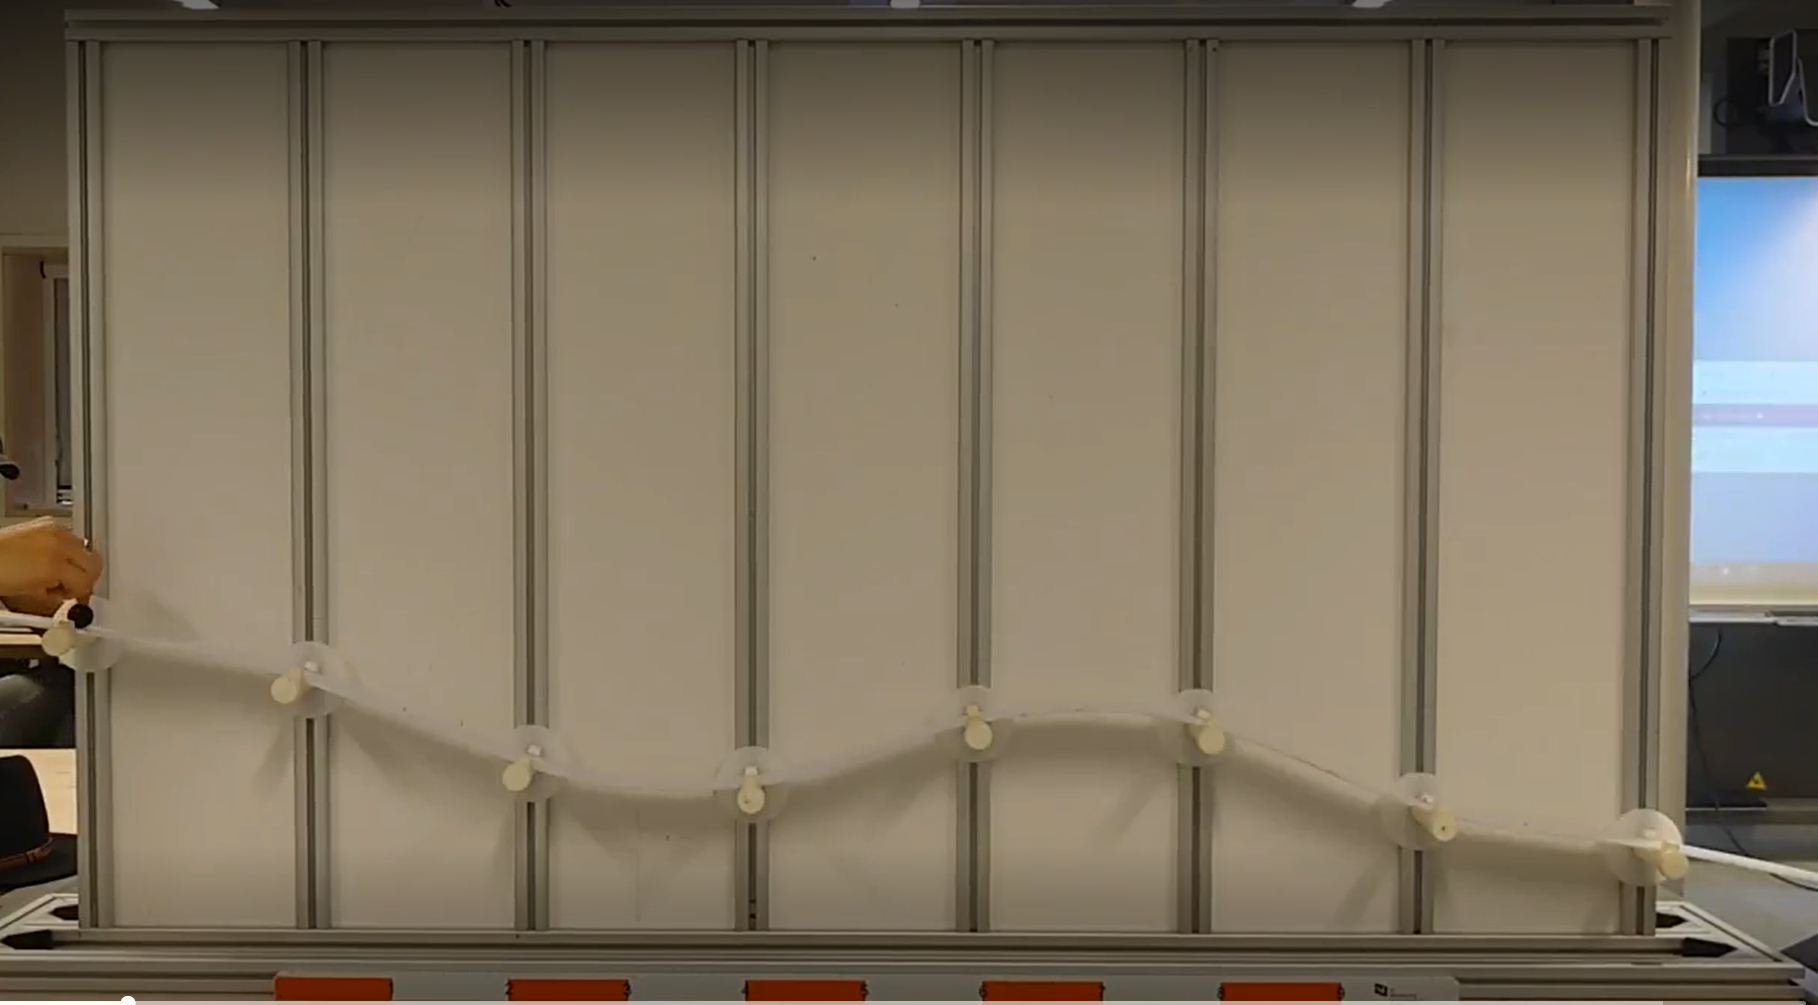


Figuren viser trajektorien vi brukte i forsøket (berg-og-dal-banen). Startposisjon til ballen er øverst til venstre, sluttposisjon nede til høyre.
Ballen slippes og ruller ned banen. Kulen filmes gjennom hele forløpet og posisjonen analyseres i analyseprogrammet *Tracker*.
Ved hjelp av avanserte algoritmer finner *Tracker* kulens relative posisjon i forhold til referansepinnen som ligger nederst på bildet. 
Ved å ta utgangspunkt i kulens forflytning mellom hvert bilde i filmen er *Tracker* i stand til å regne ut kulens hastighet, akslereasjon og krumning.

Disse resultatene vil videre presenteres i senere avsnitt.

## Resultater


I resultatene skal det presenteres:
-   Målt rulletid: 
-   Slutthastighet
-   Kinetisk energi 
-   Tap av mekanisk energi.

Resultater: Målt rulletid, slutthastighet, tilhørende kinetisk energi og
tap i mekanisk energi oppgis med middelverdi og standardfeil. Resultatavsnittet
inneholder dessuten disse figurene:
– Beregnet baneform y(x) sammen med m ̊alt y(x) for et av rulleforsøkene
– Beregnet fart v(x) sammen med m ̊alt v(x) for et av rulleforsøkene
– Beregnet friksjonskraft f (x)
– Beregnet normalkraft N (x)
– Beregnet forhold |f (x)/N (x)|


In [384]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Vi lager en (numpy-) array som inneholder x-koordinatene til festepunktene. 
Horisontal avstand mellom de 8 festepunktene er 200 mm.

In [385]:
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h

Vi setter startposisjon xmin, sluttposisjon xmax og steglengde dx = 1 mm
i x-retning. Deretter lager vi en array x med x-verdier fra 0 til 1400,
dvs for hver mm fra xmin til xmax. Funksjonen arange returnerer verdier på det halvåpne intervallet [xmin,xmax), dvs slik at xmin er med mens xmax ikke er med. Her blir dermed x[0]=xmin=0, x[1]=xmin+1*dx=1, ..., x[1400]=xmax-dx=1400, dvs x blir en tabell med 1401 elementer

In [386]:
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)

Vi lager deretter en array med høydekoordinatene til festepunktene. 
De "tilfeldige" høydeendringene fra skrue til skrue sørger for at banens
starthøyde (300 mm) er banens høyeste punkt, og at den deretter går via
en dal og en bakketopp, og noen ganger en ny dal før siste skrue.

In [387]:
#Skruehøyder:
yfast = np.array([300, 259, 184, 163, 220, 217, 142, 109])

Programmet beregner i neste omgang 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter (naboskruer), med scipy.interpolate-funksjonen CubicSpline:

In [388]:
cs = CubicSpline(xfast,yfast,bc_type='natural')

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eller som her, for alle de 1401 horisontale
posisjonene lagret i tabellen x. Funksjonen cs fungerer slik: <br>
cs(x)   tilsvarer $y(x)$ <br>
cs(x,1) tilsvarer $y'(x)$ <br>
cs(x,2) tilsvarer $y''(x)$ <br>

In [389]:
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

Nå kan vi plotte baneformen $y(x)$

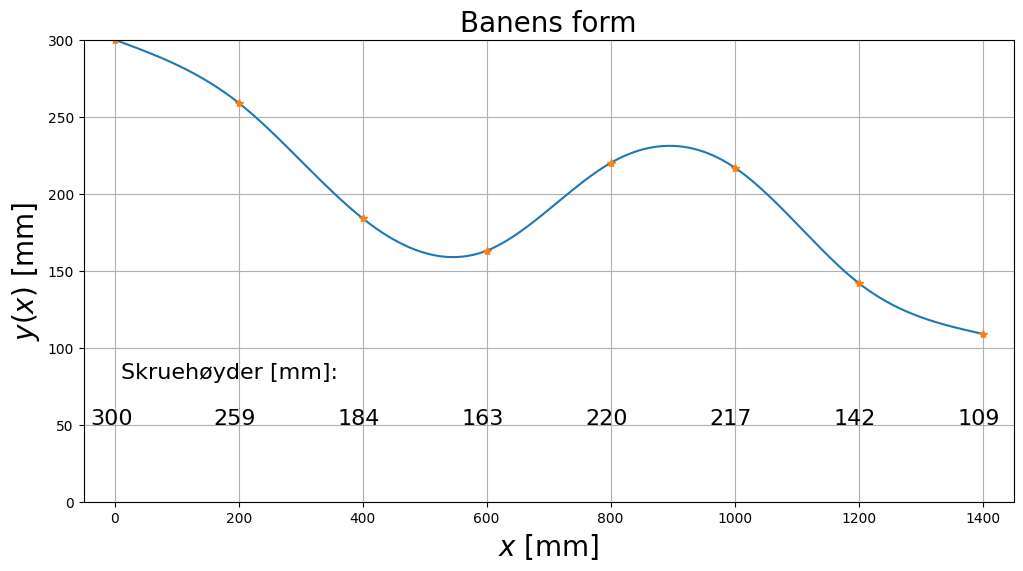

In [390]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ [mm]',fontsize=20)
plt.ylabel('$y(x)$ [mm]',fontsize=20)
plt.text(10,80,'Skruehøyder [mm]:', fontsize=16)
plt.text(-40, 50, int(yfast[0]), fontsize=16)
plt.text(160, 50, int(yfast[1]), fontsize=16)
plt.text(360, 50, int(yfast[2]), fontsize=16)
plt.text(560, 50, int(yfast[3]), fontsize=16)
plt.text(760, 50, int(yfast[4]), fontsize=16)
plt.text(960, 50, int(yfast[5]), fontsize=16)
plt.text(1160, 50, int(yfast[6]), fontsize=16)
plt.text(1360, 50, int(yfast[7]), fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()


Figur 1. Banens form beregnet numerisk.

In [391]:
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h/1000

xmin = 0
xmax = 1401/1000
dx = 1/1000
x = np.arange(xmin,xmax,dx)

yfast = np.array([300, 259, 184, 163, 220, 217, 142, 109])/1000

cs = CubicSpline(xfast,yfast,bc_type='natural')
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
K = d2y/(1+dy**2)**(1.5)
R = 1/(np.abs(K)+1E-8)  #unngår R = uendelig
Rmin = np.min(R)
beta = np.arctan(dy)
betadeg = beta*180/np.pi
startvinkel = betadeg[0]
maksvinkel = np.max(np.abs(betadeg))

print('Høyeste punkt etter 3.skrue (mm):\t', round(y37max*1000, 2))
print('Laveste punkt etter 2.skrue (mm):\t', round(y27min*1000, 2))
print('Starthelningsvinkel (grader):\t\t', round(startvinkel, 2))
print('Maksimal helningsvinkel (grader):\t', round(maksvinkel, 2))
print('Minste krumningsradius (mm):\t\t', round(Rmin*1000, 2))
print('Festepunkthøyder (mm):\t\t\t', yfast*1000)


Høyeste punkt etter 3.skrue (mm):	 231.1
Laveste punkt etter 2.skrue (mm):	 109.09
Starthelningsvinkel (grader):		 -8.45
Maksimal helningsvinkel (grader):	 22.63
Minste krumningsradius (mm):		 335.11
Festepunkthøyder (mm):			 [300. 259. 184. 163. 220. 217. 142. 109.]


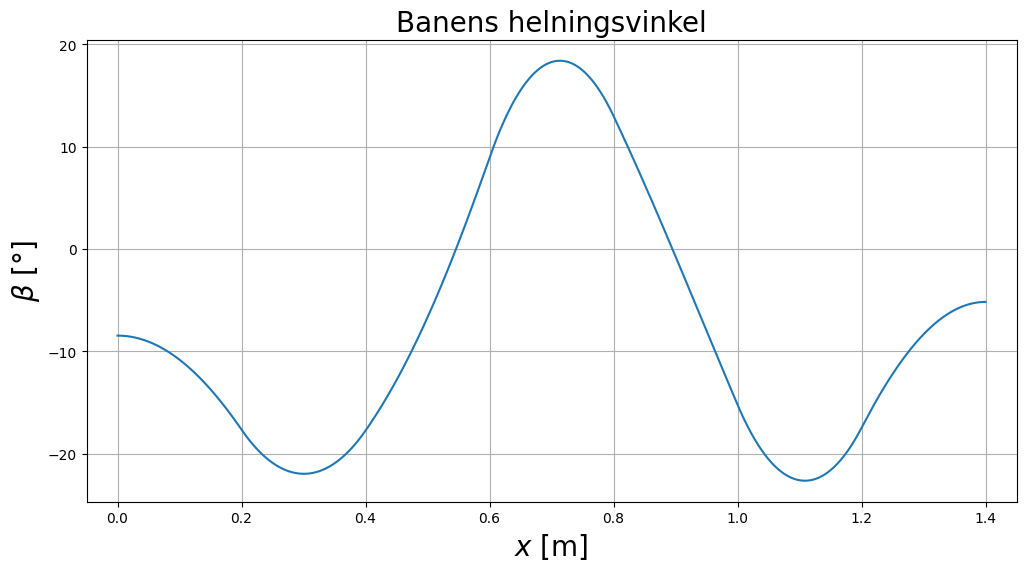

In [392]:
g = 9.81
c = 2/5
m = 0.031

helningsvinkel = plt.figure(r'$\beta$''(grader)',figsize=(12,6))
plt.plot(x, betadeg)
plt.title('Banens helningsvinkel', fontsize = 20)
plt.xlabel('$x$ [m]', fontsize=20)
plt.ylabel(r'$\beta$ $[\degree]$', fontsize = 20)
plt.xlim(-0.050,1.450)
plt.grid()
plt.show()

Figur 2. Banens helningsvinkel numerisk beregnet.

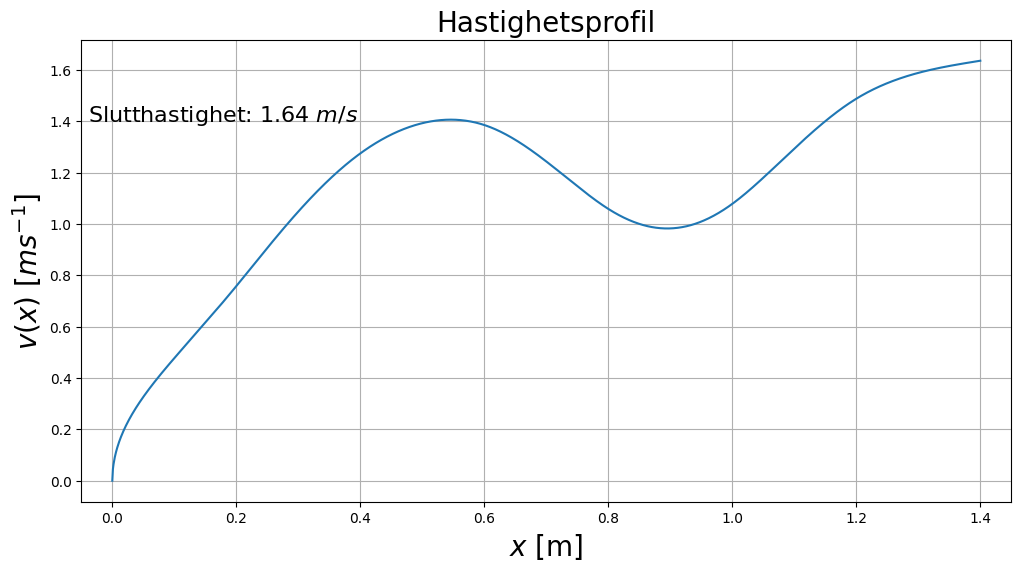

In [393]:
hastighet = np.sqrt(2*g*(y[0]-y)/(1+c))

hastighetsProfil = plt.figure('v(x)',figsize=(12,6))
plt.plot(x,hastighet)
plt.title('Hastighetsprofil', fontsize=20)
plt.xlabel('$x$ [m]',fontsize=20)
plt.ylabel('$v(x)$ $[ms^{-1}]$',fontsize=20)
plt.text(-0.040, 1.400, f"Slutthastighet: {np.round(hastighet[-1], 2)} $m/s$", fontsize=16)
plt.xlim(-0.050,1.450)
plt.grid()
plt.show()

Figur 4. Kulens hastihetsprofil numerisk beregnet. 

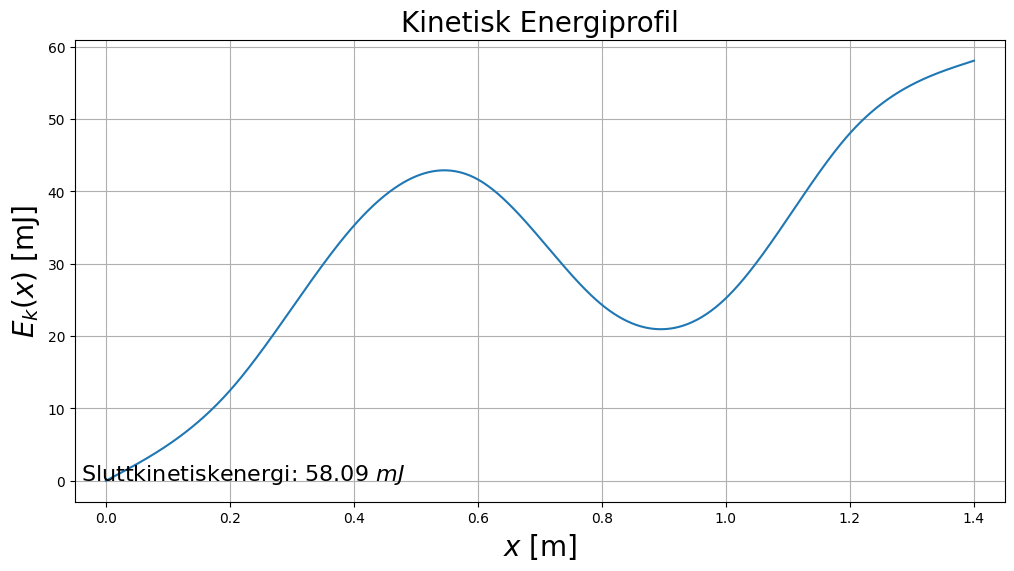

In [394]:
kinetisk_energi = (1+c)*m*hastighet**2/2

hastighetsProfil = plt.figure('$E_k(x)$',figsize=(12,6))
plt.plot(x,kinetisk_energi*1000)
plt.title('Kinetisk Energiprofil', fontsize=20)
plt.xlabel('$x$ [m]',fontsize=20)
plt.ylabel('$E_k(x)$ [mJ]',fontsize=20)
plt.text(-0.040, 0.055, f"Sluttkinetiskenergi: {np.round(kinetisk_energi[-1]*1000, 2)} $mJ$", fontsize=16)
plt.xlim(-0.050,1.450)
plt.grid()
plt.show()

Figur 5. Kinetiskenergiprofil  numerisk bergenet. Sluttkinetiskenergi er 58.09 mJ.

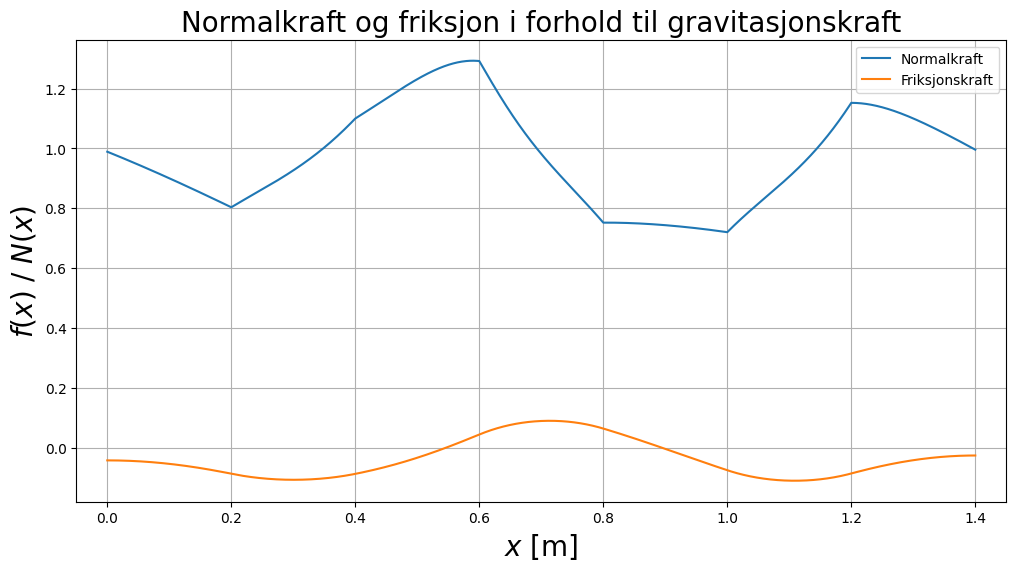

In [395]:
akselerasjon = d2y/(1+dy**2)**1.5
normalkraft = m*(g*np.cos(beta) + akselerasjon)
friksjon = c/(c+1)*m*g*np.sin(beta)
normalkraftProfil = plt.figure('N(x)/mg f(x)/mg',figsize=(12,6)) 
plt.plot(x, normalkraft/(m*g), label = "Normalkraft")
plt.plot(x, friksjon/(m*g), label = "Friksjonskraft")
plt.title('Normalkraft og friksjon i forhold til gravitasjonskraft', fontsize=20)
plt.xlabel('$x$ [m]',fontsize=20)
plt.ylabel('$f(x)$ / $N(x)$',fontsize=20)
plt.legend()
#plt.ylim(0,300)
plt.xlim(-0.050,1.450)
plt.grid()
plt.show()

Figur 6. Normalkraft og friksjon i forhold til gravitasjonskraft numerisk bergnet.

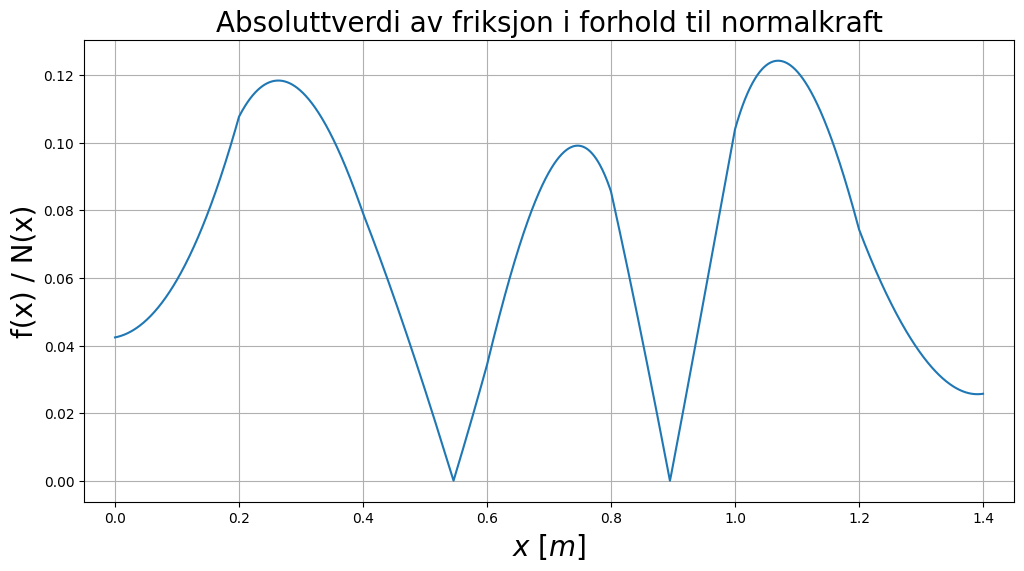

In [396]:
normalkraftProfil2 = plt.figure('f(x)/N(x)',figsize=(12,6)) 
plt.plot(x, np.abs(friksjon/normalkraft))
plt.title('Absoluttverdi av friksjon i forhold til normalkraft', fontsize=20)
plt.xlabel('$x$ $[m]$',fontsize=20)
plt.ylabel('f(x) / N(x)',fontsize=20)
#plt.ylim(0,300)
plt.xlim(-0.050,1.450)
plt.grid()
plt.show()

Figur 7. Absoluttverdi av friksjon i forhold til normalkraft numerisk bergenet.

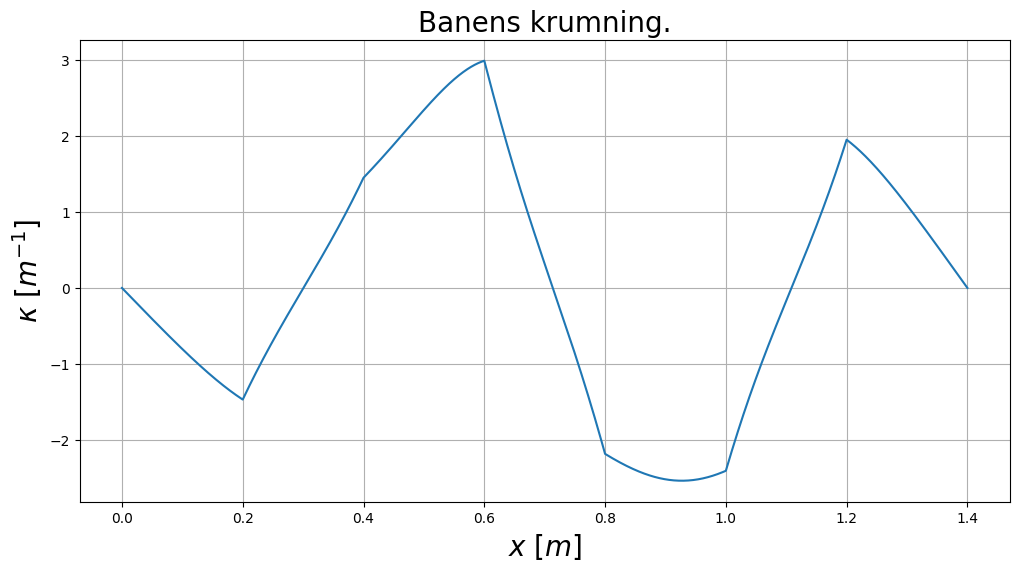

In [397]:
# Plotting av krumning 
KrumningsProfil = plt.figure('$\kappa$',figsize=(12,6))
plt.plot(x, K, label = "$\kappa$",)
#plt.plot(x, y*10, label = "$\kappa$")
plt.title ("Banens krumning.", fontsize = 20)
plt.xlabel ("$x$ $[m]$", fontsize = 20)
plt.ylabel ("$\kappa$ $[m^{-1}]$", fontsize = 20)
plt.grid()
plt.show ()

Figur 8. Banens krumning numerisk beregnet.

In [398]:
#beregning av sluttid
def slutt_tid():
    v_x = hastighet * np.cos (beta)
    v_xn = [(v_x[i-1] + v_x[i]) / 2 for i in range (1, len(x))]

    t = [dx / v_xn[i] for i in range (len (v_xn))]
    total_t = 0
    for i in t:
        total_t += i
        
    print ('Kulens totale rulletid:\t', round(total_t,2), 'sekund')
    return total_t
slutt_tid()


Kulens totale rulletid:	 1.63 sekund


1.6335879210755697

Resultater:
Siste hastigheter:			 1.54 [m/s], 1.56 [m/s], 1.55 [m/s], 1.55 [m/s], 1.56 [m/s], 1.57 [m/s], 1.49 [m/s], 1.56 [m/s], 1.51 [m/s], 1.53 [m/s]
Mekaniske energier:			 69.91 [mJ], 70.83 [mJ], 70.62 [mJ], 70.30 [mJ], 70.87 [mJ], 71.31 [mJ], 67.54 [mJ], 71.00 [mJ], 68.55 [mJ], 69.29 [mJ]
Tap in mekanisk energi:			 -21.33 [mJ], -20.40 [mJ], -20.61 [mJ], -20.93 [mJ], -20.36 [mJ], -19.92 [mJ], -23.70 [mJ], -20.23 [mJ], -22.68 [mJ], -21.94 [mJ]
Middelveri av tap i mekanisk energi:	 -21.21
Standardavvik av tap i mekanisk energi:	 1.15 [mJ]
Standardfeil i tap i mekanisk energi:	 0.36 [mJ]


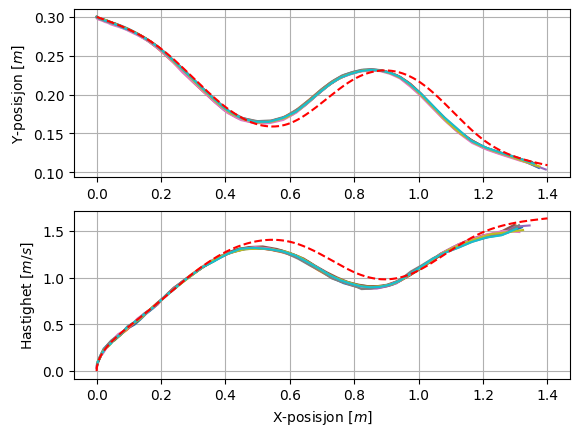

In [399]:
import pandas as pd
import os 

fig, axs = plt.subplots(2)

data_folder = "Data/"

vs = []

for file in os.listdir(data_folder):
    data = pd.read_csv(data_folder + file, dtype={'t': float, 'x': float, 'y': float, 'v': float})

    t_exp = np.array(data["t"])
    x_exp = np.array(data["x"])
    y_exp = np.array(data["y"])
    v_exp = np.array(data["v"])

    x_exp -= x_exp[0]

    y_exp += y[0] - y_exp[0]

    axs[0].plot(x_exp, y_exp)
    axs[1].plot(x_exp, v_exp)

    vs.append(v_exp[-2])

axs[0].plot(x, y, "r--")
axs[1].plot(x, hastighet, "r--")

axs[0].set_ylabel("Y-posisjon $[m]$")
axs[0].grid()

axs[1].set_xlabel("X-posisjon $[m]$")
axs[1].set_ylabel("Hastighet $[m/s]$")
axs[1].grid()

print("Resultater:")

print("Siste hastigheter:\t\t\t", ", ".join([f"{(round(v,2)):.2f} [m/s]" for v in vs]))

masse = 0.031 # kg
ks = [1/2*masse*v**2 + masse*g*y[-1] for v in vs]
g = 9.81

print("Mekaniske energier:\t\t\t", ", ".join([f"{(round(k*1000,2)):.2f} [mJ]" for k in ks]))

des = [k - masse*g*y[0] for k in ks]

print("Tap in mekanisk energi:\t\t\t", ", ".join([f"{round(de*1000,2):.2f} [mJ]" for de in des]))

avg_de = sum(des)/len(des)

print("Middelveri av tap i mekanisk energi:\t", round(avg_de*1000,2))

std_d_de = np.std(des)

std_e_de = std_d_de/np.sqrt(len(des))

print("Standardavvik av tap i mekanisk energi:\t", round(std_d_de*1000,2),"[mJ]")
print("Standardfeil i tap i mekanisk energi:\t", round(std_e_de*1000,2),"[mJ]")

plt.show()

Figur 9. Plot av posisjonen øverst i figuren. Nederst vises plot av Hastigheten i forhold til posisjonen i x- retning. 

## Diskusjon

Banen ble beregnet numerisk som redegjort for i teoridelen. Imidlertid viser figur 9 at kulens faktiske bane avvek noe fra den beregnede banen. Avviket i bane skyldes antageligvis små feil i kalibreringen av den fysiske banen samt egenskaper ved materialet til kulebanen vist i figur 1. Figur 9 indikerer alikevel at avviket er lite, slik at betraktninger rundt systemets fysiske egenskaper basert på numeriske utregninger er relevante. I mangel på fysiske data vil de numeriske utregningene legges til grunn i den videre diskusjonen. 

Som redegjort for i teoridelen er det viktig at banens krumming alltid er større enn kulens radius. Figur 8 viser at banens krumming aldri er lik eller mindre enn 11 mm., noe som sikrer at kulen ruller som ønsket. 

Kulens slutthastighet er beregnet ved å utnytte bevaring av mekanisk energi. Ved startiden vil kula ha kinetisk energi lik 0. Dette leder til at kulas mekaniske energi er bestemt ved kulas masse og høyde over bakken. Ved sluttiden 1.6 sekunder vil kulas mekaniske energi være bestemt av både kulas hastighet og kulas potensielle energi. Disse forholdene lar oss beregne kulas slutthastighet som en funksjon av mekanisk energi starttiden og sluttiden. I denne sammenheng vises det til figur 5 som indikerer at den kinetiske energien økte ved brattere helning nedover. Våre beregninger viser en slutthastighet på omtrent 1.64m/s. 

Figur 6 viser beregninger av friksjnoskraft og noralkraft. Kurvene inidkerer en viss sammenheng mellom de to kreftene, hvilket samstemmer med relasjonen $f$ = $\mu$ * $N$ der $f$ er friksjonskraften, $\mu$ er friksjonskoeffisienten og $N$ er normalkraften. Forholdet er imidlertid ikke perfekt, noe som kan skyldes banens krumming og helning. Endringer i helningen vil føre til endringer i tyngdens vektorielle komponenter. I forlengelsen leder endringer i tyngden til endringer i normalkraften og dermed friksjonskraften. Samtidig vil friksjonskraften ballansere mot tyngdens drag langs banen, slik at friksjonskraften ikke følger endringen i normalkraften fullt ut. Eksempelvis avtar normalkraften når banen heller bratt nedover, imens friksjonskraften vil ballansere mot tyngdens drag langs banen. Disse betraktningene stemmer med figur 7 som indikerer økt friksjonskraft ved bratte helninger. 

Avslutningsvis viser modellen vår at kulen har mistet mekanisk energi ved sluttiden. Tapet er på omtrent 0.0212 Joule med en standardfeil på omtrent 0.0004 Joule. Tapet skyldes forhold som friksjon og luftmotstand og demonstrerer at mekanisk energi svært skjeldent er bevart i virkeligheten. 


## Konklusjon
Ved å sette opp en ideell modell og et reelt system av samme baneform og sammenligne responsen til en kule som ruller ned banen ser en at, i forhold til den ideelle modellen, har det reelle systemet signifikante energitap til omgivelsene. Likevel er den reelle responsen av lignende form til den ideelle noe som tyder på at energibevarelseslovene og newtons andre bevegelseslov kan brukes til å beskrive systemet, men at det er idealiseringene og forenklingene gjort i modellen som forklarer forskjellene i respons.